# Simple Linear Regression

In [1]:
def predict(alpha: float, beta: float, x_i: float) -> float:
    return beta * x_i + alpha

In [2]:
def error(alpha: float, beta: float, x_i: float, y_i: float) -> float:
    '''the error from predicting beta * x_i + alpha
    when the actual value is y_i
    '''
    return predict(alpha, beta, x_i) - y_i

In [3]:
from linearalgebra import Vector
from typing import Tuple
from stati import correlation, standard_deviation, mean

In [4]:
def sum_of_sqerrors(alpha: float, beta: float, x: Vector, y: Vector) -> float:
    return sum(error(alpha, beta, x_i, y_i) ** 2
                for x_i, y_i in zip(x, y))

In [69]:
def least_squares_fit(x: Vector, y: Vector) -> Tuple[float, float]:
    '''Given two vector x and y,
    find the least-square values of alpha and beta'''
    beta = correlation(x, y) * standard_deviation(y) / standard_deviation(x)
    alpha = mean(y) - beta * mean(x)
    return alpha, beta

In [70]:
x = [i for i in range(-100, 110, 10)]
y = [3 * i - 5 for i in  x]

assert least_squares_fit(x, y) == (-5, 3)

In [71]:
age = [1,2,3,4]
weight = [14, 21, 28, 35]
least_squares_fit(age, weight)

(7.0, 7.0)

In [90]:
from stati import num_friends_good, daily_minutes_good
from matplotlib import pyplot as plt
import numpy as np

In [91]:
alpha, beta = least_squares_fit(num_friends_good, daily_minutes_good)
print(alpha, beta)
m, b = np.polyfit(num_friends_good, daily_minutes_good, 1)
print(m, b)
num_friends = np.array(num_friends_good, dtype=float)
daily_mint = np.array(daily_minutes_good, dtype=float)

22.94755241346903 0.903865945605865
0.9038659456058701 22.947552413469005


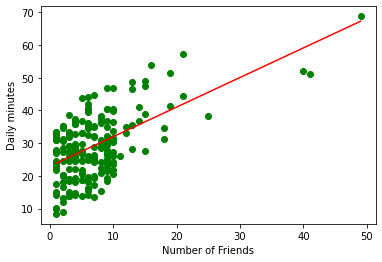

In [92]:
plt.scatter(num_friends_good, daily_minutes_good, color='green')
plt.plot(num_friends_good, m*num_friends + b,  color='red')
plt.xlabel('Number of Friends')
plt.ylabel('Daily minutes')
plt.show()